# What Is Classification

Classification is grouping of objects and samples into preset categories.

<img src="img/classification_vs_regression.png" width=40%>

There are two types of classification; **Binary** and **Multiclass**

<img src="img/binary_multi.png" width=40%>

[credit](https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc)  

In SVM (Support Vector Machine) decision for binary classification:
- $wx+b=0$ , on the line
- $wx+b>0$, positive class 
- $wx+b<0$, negative class

<img src="img/lr_1.png" width=60%>

In Logistic Regression, linear model is fit to sigmoid function to provide below constraints

- $f(x)>0.5$, positive class 
- $f(x)<0.5$, negative class

# Performance Metrics On Classification Tasks

![confusion matrix](img/metrics1.png)

[credit](https://media-exp1.licdn.com/dms/document/C561FAQH6IGK-gLA7VQ/feedshare-document-pdf-analyzed/0/1646243769182?e=1646553600&v=beta&t=gW_m3PNakV7LWD2Php09dAc4iDk69806vfZmGweuuW8)

## Accuracy

``Accuracy = (All corectly predcited) / (All Samples)``

$Recall = (TP+TN) / (FP+TP+TN+FN) $


<img src="img/accuracy.png" width=50%>

Problem with accuracy in unbalanced data with 100 (10 + 90) samples:


|                    | Predicted Not Cancer |Predicted Cancer |
| -----------        | ---                  | ---             |
| Actual Not Cancer  | 88                   | 2               |
| Actual Cancer      | 7                    | 3               |


$Accuracy = (3 + 88) / 100 = 91\%$

## Recall (Sensitivity, True Positive Rate)

 ``Recall = (All corectly predcited Positive Samples) / (All Actual Positive Samples)`` 
 
  $Recall = TP / (TP + FN) $

<img src="img/ds1.png" width=50%>

$TP / (TP + FN) = 4 / 5 = 80\%$

Problem with recall in unbalanced data with 100 (10 + 90) samples:


|                    | Predicted Not Cancer |Predicted Cancer |
| -----------        | ---                  | ---             |
| Actual Not Cancer  | 88                   | 2               |
| Actual Cancer      | 7                    | 3               |


$Recall= 3 / (3+7) = 30\% $

(Accuracy is 85%)

<img src="img/hack_recall.png" width=50%>

[credit](https://media-exp1.licdn.com/dms/document/C561FAQH6IGK-gLA7VQ/feedshare-document-pdf-analyzed/0/1646243769182?e=1646553600&v=beta&t=gW_m3PNakV7LWD2Php09dAc4iDk69806vfZmGweuuW8)


## Presicion

 ``Presicion = (corectly predcited Positive Samples) / (All predcited Positives (correct or not))`` 
 
$ Presicion = TP / (TP + FP) $

<img src="img/ds1.png" width=50%>

$TP / (TP + FP) = 4 / 6 = 66\% $

In unbalanced data with 100 (10 + 90) samples:


|                    | Predicted Not Cancer |Predicted Cancer |
| -----------        | ---                  | ---             |
| Actual Not Cancer  | 88                   | 2               |
| Actual Cancer      | 7                    | 3               |


$Presicion= 3 / (3 + 2) = 60\% $

(Accuracy:85%, Recall:30%)

<img src="img/hack_presicion.png" width=50%>


## F1 Score

``F1 = 2 * Presicion * Recall / (Presicion + Recall)``

- Harmonic mean of Presicion & Recall
- Balance metric between Presicion & Recall
- Usefull for unbalanced dataset

In unbalanced data with 100 (10 + 90) samples:


$F1 = 2 * Presicion * Recall / (Presicion + Recall) = 2 * 0.6 * 0.3 / (0.6 + 0.3) = 40\%$


(Accuracy:85%, Recall:30% , Presicion:60%)

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

The ROC curve is a plot of True Positive Rate (TPR) on the y-axis vs False Positive Rate (FPR) on the x-axis.

$TPR = TP / (TP + FN) $ -> (Recall)

$FPR = FP / (FP + TN) $ ->  False Positives (Actually negative) / All actual negatives)




Purpose of ROC Curve:
1. Analysing the strength/predictive power of a classifier.
2. Determining optimal threshold.
3. Comparing two models (using Area Under the Curve).

<img src="img/Roc_curve.png" width=30%>

[credit](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

Notes:
- For every threshold confusion matrix is reconstructed and TPR & FPR calculated
- For every TPR & FPR pair a graph is plotted
- More Area under Curve (AUC) value better the model is
- The curve that streches to point (0.0,1.0) , left upper corner, has better ROC score
- It is not suitable for unbalanced datasets.

## Precision and Recall Curve

The precision-recall (PR) curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision where;
 - high precision relates to a low false positive rate (FP), 
 - high recall relates to a low false negative rate (FN).

<img src="img/pr_curve.png" width=30%>

[credit](https://analyticsindiamag.com/complete-guide-to-understanding-precision-and-recall-curves/)

Some important pointers on the curve:

- Point 1 corresponds to the threshold of 1
- Point 3 corresponds to the threshold of 0
- Point 4 corresponds to the threshold somewhere in the range (0, 1)
- Point 2 corresponds to a Perfect model (along with Point 3)

Notes:
- PR curve is more sutitable in unbalanced data than ROC.
- To calculate optimum threshold using PR curve, a threshold level closest to point 2 should be selected.
- A better curve tends to move to point 2.


---

# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split

In [2]:

import warnings
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10, 6)
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Prepare Data

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.Outcome.value_counts()


0    500
1    268
Name: Outcome, dtype: int64

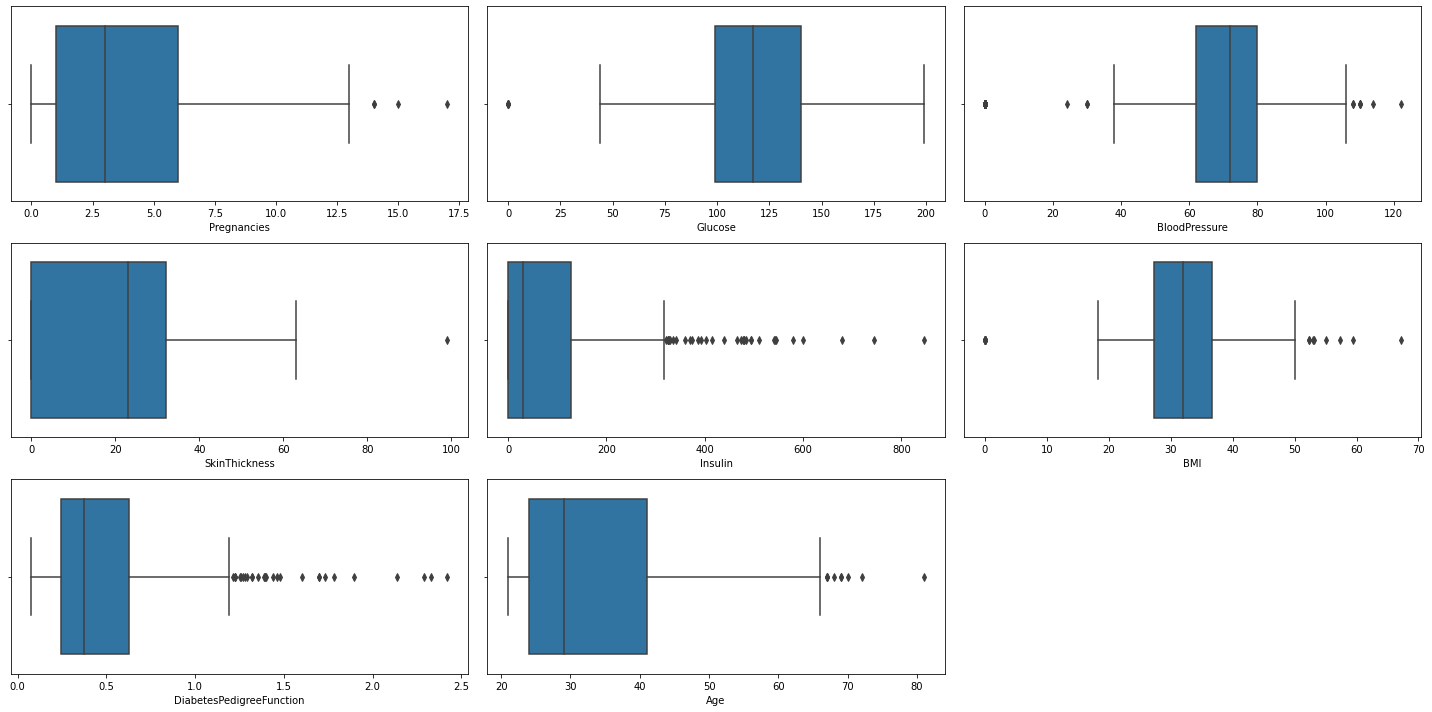

In [5]:
index = 0
plt.figure(figsize=(20, 10))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3, 3, index)
        sns.boxplot(df[feature])

plt.tight_layout()
plt.show()


In [6]:
df = df[(df.SkinThickness < 70) & (df.Glucose > 0)
        & (df.BloodPressure > 35) & (df.BMI > 0)]
df.Outcome.value_counts()


0    473
1    247
Name: Outcome, dtype: int64

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


<IPython.core.display.Javascript object>

In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve


def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


# Logistic Regression

Import libraries

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
log_model = LogisticRegression()


In [10]:
log_model.get_params().keys()


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

Notes:
- Logistic Regression penalty term (l1, l2, elasticnet) is used for regularizaiton.

- C : Regularization parameter, lower C (close to 0) more regularization

- class_weight :used when data unbalanced, the “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as ``n_samples / (n_classes * np.bincount(y))``.

- solver : For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large datasets. For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss.

[Logistic Regression Libray Page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Grid Search

In [11]:
param_grid = {'lr__penalty': ["l1", "l2"],
              'lr__C': np.logspace(-2, 2, 10),
              'lr__solver': ["lbfgs", "liblinear"]}


In [12]:
operations = [("scaler", StandardScaler()), ("lr", LogisticRegression(
    class_weight="balanced", random_state=34))]
model = Pipeline(steps=operations)

lr_model_grid = GridSearchCV(
    model, param_grid, scoring="recall", cv=5, n_jobs=-1)

lr_model_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=34))]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['lbfgs', 'liblinear']},
             scoring='recall')

In [13]:
lr_model_grid.best_params_


{'lr__C': 0.0774263682681127, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

In [14]:
eval_metric(lr_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[286  92]
 [ 47 151]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.80       378
           1       0.62      0.76      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



Cross Validate Model

In [15]:
operations = [("scaler", StandardScaler()),
              ("lr", LogisticRegression(class_weight="balanced", C=0.0774, penalty="l1",
                                        solver='liblinear', random_state=34))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=[
                        'precision', 'recall', 'f1', 'accuracy'], cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_precision   0.617
test_recall      0.748
test_f1          0.674
test_accuracy    0.748
dtype: float64

Plot Persicion Recall Graph & Save Model Score

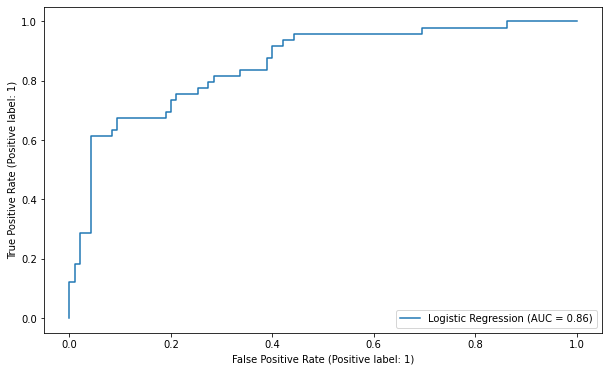

In [16]:
plot_roc_curve(lr_model_grid, X_test, y_test, name="Logistic Regression")


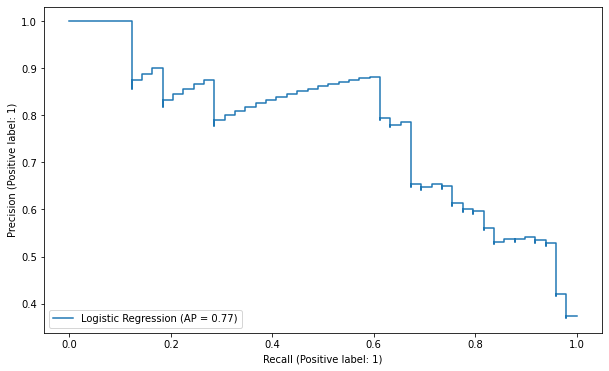

In [17]:
plot_precision_recall_curve(lr_model_grid, X_test,
                            y_test, name="Logistic Regression")


In [18]:
y_pred_lr = lr_model_grid.predict(X_test)
result = pd.DataFrame({"F1": f1_score(y_test, y_pred_lr, average="weighted"),
                      "Recall": recall_score(y_test, y_pred_lr)}, index=["logistic_regression"])
result


,F1,Recall
logistic_regression,0.781,0.735


---

# K-Nearest Neighbors(KNN)

Notes:
- A lazy learner, no model constructed, all data is stored for prediction
- Prediction made according to the test samples' closest neighbours
- Non-parametric
- Scaling is important, because it is based on distance 
- Not suitable for big datasets
- Selecting optimal **k** is the most imported step (Elbow method)
- Bigger **k** causes underfitting, while lower **k** overfitting

Params:
- weights; {‘uniform’, ‘distance’}, neigbours' distance effects on voting
- p;  Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2)

[KNN Libray Page](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


<img src="img/knn.png" width=70%>

Import libraries

In [19]:
from sklearn.neighbors import KNeighborsClassifier


Grid Search

In [20]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)


In [21]:
param_grid = {'knn__n_neighbors': range(1, 30)}
knn_model_grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='recall')
knn_model_grid.fit(X_train, y_train)
knn_model_grid.best_params_


{'knn__n_neighbors': 3}

Elbow method for k selection

In [22]:
test_error_rates = []
train_error_rates = []


for k in range(1, 30):

    operations = [("scaler", StandardScaler()),
                  ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn = Pipeline(steps=operations)

    knn.fit(X_train, y_train)

    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)

    test_error = 1 - recall_score(y_test, y_pred_test)
    train_error = 1 - recall_score(y_train, y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)


Text(0, 0.5, 'Error Rate')

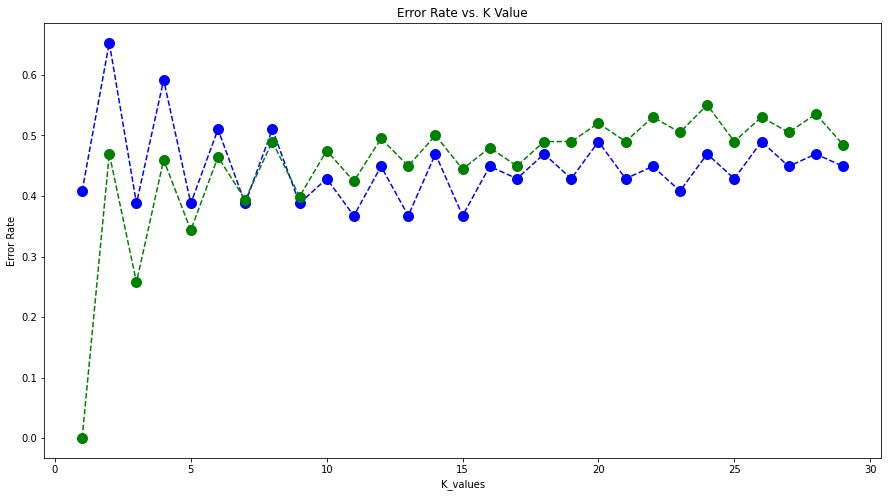

In [23]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')


With ellbow method selecting $k=5$ is a good option

Cross Validate Model

In [24]:
eval_metric(knn_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[76 19]
 [19 30]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        95
           1       0.61      0.61      0.61        49

    accuracy                           0.74       144
   macro avg       0.71      0.71      0.71       144
weighted avg       0.74      0.74      0.74       144


Train_Set
[[352  26]
 [ 51 147]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       378
           1       0.85      0.74      0.79       198

    accuracy                           0.87       576
   macro avg       0.86      0.84      0.85       576
weighted avg       0.87      0.87      0.86       576



In [25]:

operations = [("scaler", StandardScaler()),
              ("knn", KNeighborsClassifier(n_neighbors=5))]
knn1 = Pipeline(steps=operations)
scores = cross_validate(knn1, X_train, y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'], cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]


test_accuracy    0.722
test_precision   0.615
test_recall      0.505
test_f1          0.553
dtype: float64

Save Model Score

In [26]:
y_pred_knn = knn_model_grid.predict(X_test)
res = pd.DataFrame({"F1": f1_score(y_test, y_pred_knn, average="weighted"),
                    "Recall": recall_score(y_test, y_pred_knn)}, index=["knn"])
result = pd.concat([result, res], axis=0)
result


,F1,Recall
logistic_regression,0.781,0.735
knn,0.736,0.612


---

# SVM, Support Vector Machines

Notes:
- Find a separating best line that maximizes the margin (gap) between positive and negative samples
- C parameter is regularization parameter, inverse of aplha in linesr regression, increase in C causes overfitting
- Kernel trick is the key point of SVM
- gamma parameter is only for kernel other than linear, increasing gamma causes more complex boundaries

[SVM Libray Page](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

<img src="img/svm.png" width=70%>
<img src="img/svm2.png" width=70%>
<img src="img/svm3.png" width=70%>


Import libraries

In [27]:
from sklearn.svm import SVC


Grid Search

In [28]:
operations = [("scaler", StandardScaler()),
              ("svm", SVC(class_weight="balanced", random_state=42))]
svm_model = Pipeline(steps=operations)

param_grid = {'svm__C': [0.001, 0.05, 0.01, 0.1],
              'svm__gamma': ["scale", "auto", 0.3, 2],
              'svm__kernel': ['rbf', 'linear']}

svm_model_grid = GridSearchCV(
    svm_model, param_grid, scoring="recall", cv=10, n_jobs=-1)
svm_model_grid.fit(X_train, y_train)
svm_model_grid.best_params_


{'svm__C': 0.05, 'svm__gamma': 0.3, 'svm__kernel': 'rbf'}

In [29]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[45 50]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        95
           1       0.48      0.94      0.63        49

    accuracy                           0.63       144
   macro avg       0.71      0.71      0.63       144
weighted avg       0.78      0.63      0.63       144


Train_Set
[[190 188]
 [ 19 179]]
              precision    recall  f1-score   support

           0       0.91      0.50      0.65       378
           1       0.49      0.90      0.63       198

    accuracy                           0.64       576
   macro avg       0.70      0.70      0.64       576
weighted avg       0.76      0.64      0.64       576



Cross Validate Model

In [30]:
operations = [("scaler", StandardScaler()), ("svm", SVC(C=0.3, gamma=0.3, kernel='rbf', probability=True,
                                                        class_weight="balanced", random_state=42))]
svm_model_cv = Pipeline(steps=operations)

scores = cross_validate(svm_model_cv, X_train, y_train, scoring=[
                        'accuracy', 'precision', 'recall', 'f1'], cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]


test_accuracy    0.707
test_precision   0.551
test_recall      0.854
test_f1          0.669
dtype: float64

Save Model Score

In [31]:
y_pred_svm = svm_model_grid.predict(X_test)
res = pd.DataFrame({"F1": f1_score(y_test, y_pred_svm, average="weighted"),
                    "Recall": recall_score(y_test, y_pred_svm)}, index=["svm"])
result = pd.concat([result, res], axis=0)
result


,F1,Recall
logistic_regression,0.781,0.735
knn,0.736,0.612
svm,0.631,0.939


---

#  Decision Tree

Notes:
- Aim in spiltting is to get highest homogenety among regions
- Spliting according to **Gini Index** and **Entropy**
- Gini is a criterion to minimize the probability of misclassification
- Entropy (chaos) measures the impurity or uncertainty in a group of observations. Aim for better split is to minimize entropy that results in higher **Information Gain**.
- **Scaling** or **get_dummies** is not necessary, but **Encoder** is used for categorical varibles 
- Encoder, ``from sklearn.preprocessing import OrdinalEncoder``

[Decision Tree Classifier Library Page](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

<img src="img/dt1.png" width=70%>

Import libraries

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


Grid Search

In [33]:
param_grid = {"splitter": ["best", "random"],
              "max_features": ["auto", 2, 6],
              "max_depth": [2,3],
              "min_samples_leaf": [1, 2, 3],
              "min_samples_split": [2,3]}

dt_model = DecisionTreeClassifier(random_state=101)

dt_model_grid = GridSearchCV(estimator=dt_model,
                             param_grid=param_grid,
                             scoring='recall',
                             cv=10,
                             n_jobs=-1)

dt_model_grid.fit(X_train, y_train)

dt_model_grid.best_params_


{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [34]:
eval_metric(dt_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[79 16]
 [17 32]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        95
           1       0.67      0.65      0.66        49

    accuracy                           0.77       144
   macro avg       0.74      0.74      0.74       144
weighted avg       0.77      0.77      0.77       144


Train_Set
[[292  86]
 [ 75 123]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       378
           1       0.59      0.62      0.60       198

    accuracy                           0.72       576
   macro avg       0.69      0.70      0.69       576
weighted avg       0.72      0.72      0.72       576



Cross Validate Model

In [35]:
dt_model_cv = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1,
                                     min_samples_split=2, max_features="auto",
                                     splitter="random", random_state=101)

scores = cross_validate(dt_model_cv, X_train, y_train, scoring=[
                        'accuracy', 'precision', 'recall', 'f1'], cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]


test_accuracy    0.721
test_precision   0.606
test_recall      0.601
test_f1          0.598
dtype: float64

Feature Importance

In [36]:
dt_model_final = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1,
                                        min_samples_split=8, max_features=None,
                                        splitter="random",     random_state=101).fit(X_train, y_train)

df_f_i = pd.DataFrame(index=X.columns, data=dt_model_final.feature_importances_,
                      columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i


,Feature Importance
Glucose,0.834
Insulin,0.087
DiabetesPedigreeFunction,0.039
BloodPressure,0.019
Pregnancies,0.015
SkinThickness,0.005
BMI,0.000
Age,0.000


Plot tree

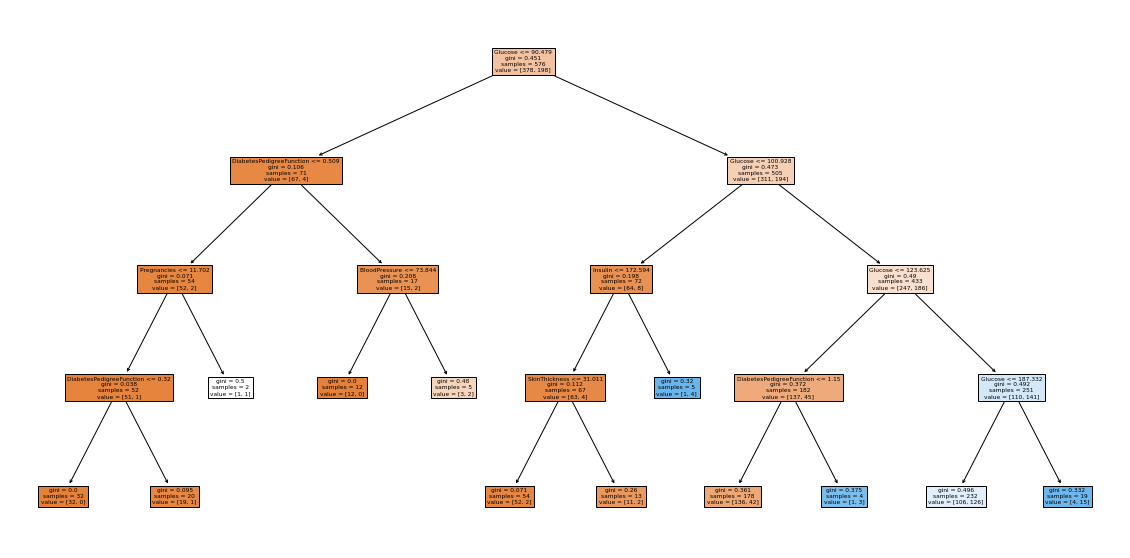

In [37]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model_final, filled=True, feature_names=X.columns);


Save Model Score

In [38]:
y_pred_dt = dt_model_grid.predict(X_test)
res = pd.DataFrame({"F1": f1_score(y_test, y_pred_dt, average="weighted"),
                    "Recall": recall_score(y_test, y_pred_dt)}, index=["dt"])
result = pd.concat([result, res], axis=0)
result


,F1,Recall
logistic_regression,0.781,0.735
knn,0.736,0.612
svm,0.631,0.939
dt,0.770,0.653


---

# Random Forest

Notes on Ensemble Models:
- Ensemble methods, uses voting combines models of same type, a lot of tiny diverse models
- Bagging (Bootstrap AGGregatING), individual separate models, equal vote weights
- Boosting, influenced by previous models, vote weights by performance 


<img src="img/bagging1.png">

Notes Random Forest:
- Feature importance
- Same model for bootstrapped (2/3) sub-samples
- n_estimator, number of models
- max_depth, depth of tree
- min_samples_split, default=2

[Random Forest Classifier Library Page](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


Import libraries

In [39]:
from sklearn.ensemble import RandomForestClassifier


Grid Search

In [40]:
param_grid = {'n_estimators': [64, 128, 300, 500],
              'max_features': [2, 3, 4, "auto"],
              'max_depth': [2, 3, 4],
              'min_samples_split': [2, 3]}

rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model_grid = GridSearchCV(rf_model, param_grid, scoring="recall",
                             n_jobs=-1, verbose=2).fit(X_train, y_train)

rf_model_grid.best_params_


Fitting 5 folds for each of 96 candidates, totalling 480 fits


{'max_depth': 2, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 64}

In [41]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[68 27]
 [12 37]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        95
           1       0.58      0.76      0.65        49

    accuracy                           0.73       144
   macro avg       0.71      0.74      0.72       144
weighted avg       0.76      0.73      0.74       144


Train_Set
[[279  99]
 [ 33 165]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       378
           1       0.62      0.83      0.71       198

    accuracy                           0.77       576
   macro avg       0.76      0.79      0.76       576
weighted avg       0.80      0.77      0.78       576



Cross Validate Model

In [42]:
rf_model_cv = RandomForestClassifier(class_weight="balanced", random_state=101,**rf_model_grid.best_params_)

scores = cross_validate(rf_model_cv, X_train, y_train, scoring=[
                        'accuracy', 'precision', 'recall', 'f1'], cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]


test_accuracy    0.755
test_precision   0.619
test_recall      0.798
test_f1          0.694
dtype: float64

Save Model Score

In [43]:
y_pred_rf = rf_model_grid.predict(X_test)
res = pd.DataFrame({"F1": f1_score(y_test, y_pred_rf, average="weighted"),
                    "Recall": recall_score(y_test, y_pred_rf)}, index=["rf"])
result = pd.concat([result, res], axis=0)
result


,F1,Recall
logistic_regression,0.781,0.735
knn,0.736,0.612
svm,0.631,0.939
dt,0.770,0.653
rf,0.736,0.755


---

# Adaboost, Adaptive Boosting

Notes:
- Ensemble method, any algorithm can be used (SVM, Logistic,...)
- Next algorithm tries to improve misclassified samples

[Ada Boost Classifer Library Page](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

<img src="img/adaboost.png">

[credit](https://www.researchgate.net/figure/Representation-of-the-adaptive-boosting_fig4_328334026)

Import libraries

In [44]:
from sklearn.ensemble import AdaBoostClassifier


Grid Search

In [45]:
ada_model = AdaBoostClassifier(random_state=101)
param_grid = {"n_estimators": [50, 200],
              "learning_rate": [0.01, 0.1]}
ada_model_grid = GridSearchCV(
    ada_model, param_grid, cv=5, scoring='recall', n_jobs=-1).fit(X_train, y_train)
ada_model_grid.best_params_


{'learning_rate': 0.1, 'n_estimators': 200}

In [46]:
eval_metric(ada_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[83 12]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        95
           1       0.71      0.59      0.64        49

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.77      0.78      0.77       144


Train_Set
[[342  36]
 [ 71 127]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       378
           1       0.78      0.64      0.70       198

    accuracy                           0.81       576
   macro avg       0.80      0.77      0.78       576
weighted avg       0.81      0.81      0.81       576



Cross Validate Model

In [47]:
ada_model_cv = AdaBoostClassifier(
    random_state=101, **ada_model_grid.best_params_)

scores = cross_validate(ada_model_cv, X_train, y_train, scoring=[
                        'accuracy', 'precision', 'recall', 'f1'], cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))

df_scores.mean()[2:]


test_accuracy    0.764
test_precision   0.696
test_recall      0.556
test_f1          0.618
dtype: float64

Save Model Score

In [48]:
y_pred_ada = ada_model_grid.predict(X_test)
res = pd.DataFrame({"F1": f1_score(y_test, y_pred_ada, average="weighted"),
                    "Recall": recall_score(y_test, y_pred_ada)}, index=["ada"])
result = pd.concat([result, res], axis=0)
result


,F1,Recall
logistic_regression,0.781,0.735
knn,0.736,0.612
svm,0.631,0.939
dt,0.770,0.653
rf,0.736,0.755
ada,0.772,0.592


---

# Gradient Boosting

Notes:
- Focus on minimizing the residual of previous tree

[Gradient Boosting Classifier Library Page](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

<img src="img/gboost.png">

[credit](https://www.geeksforgeeks.org/ml-gradient-boosting/)

Import libraries

In [49]:
from sklearn.ensemble import GradientBoostingClassifier


Grid Search

In [50]:
param_grid = {"n_estimators": [100,  200,300],
              "subsample": [0.7,1], 
              "learning_rate": [0.01], 'max_depth': [2,3,4]}
gb_model = GradientBoostingClassifier(random_state=101)
gb_model_grid = GridSearchCV(gb_model, param_grid, scoring="recall",
                             verbose=2, n_jobs=-1).fit(X_train, y_train)
gb_model_grid.best_params_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}

In [51]:
eval_metric(gb_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[83 12]
 [17 32]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        95
           1       0.73      0.65      0.69        49

    accuracy                           0.80       144
   macro avg       0.78      0.76      0.77       144
weighted avg       0.80      0.80      0.80       144


Train_Set
[[350  28]
 [ 61 137]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       378
           1       0.83      0.69      0.75       198

    accuracy                           0.85       576
   macro avg       0.84      0.81      0.82       576
weighted avg       0.84      0.85      0.84       576



Cross Validate Model

In [52]:
gb_model_cv = GradientBoostingClassifier(random_state=101, **gb_model_grid.best_params_)

scores = cross_validate(gb_model_cv, X_train, y_train, scoring=['accuracy', 'precision', 'recall',
                                                                'f1', 'roc_auc'], cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]


test_accuracy    0.760
test_precision   0.682
test_recall      0.571
test_f1          0.622
test_roc_auc     0.829
dtype: float64

Save Model Score

In [53]:
y_pred_gb = gb_model_grid.predict(X_test)
res = pd.DataFrame({"F1": f1_score(y_test, y_pred_gb, average="weighted"),
                    "Recall": recall_score(y_test, y_pred_gb)}, index=["gboost"])
result = pd.concat([result, res], axis=0)
result


,F1,Recall
logistic_regression,0.781,0.735
knn,0.736,0.612
svm,0.631,0.939
dt,0.770,0.653
rf,0.736,0.755
ada,0.772,0.592
gboost,0.796,0.653


---

# XG Boost

Notes:
- GBoost with regularization
- Faster in big data, parallel processing 
- Built in cross validation
- No need for EDA, no need to fill missing values
- Feature importance
- Too many hyperparameter

[XGBoost Library Page](https://xgboost.readthedocs.io/en/stable/python/python_api.html?highlight=xgbclassifier#xgboost.XGBClassifier)


Import libraries

In [54]:
from xgboost import XGBClassifier


Grid Search

In [55]:
param_grid = {"n_estimators": [100,200], 'max_depth': [2,3, 4], "learning_rate": [0.05, 0.01],
               "colsample_bytree": [0.7,1], "scale_pos_weight":[1.5,2.5]}
xgb_model = XGBClassifier(random_state=101)
xgb_model_grid = GridSearchCV(
    xgb_model, param_grid, scoring="recall", verbose=2, n_jobs=-1).fit(X_train, y_train)
xgb_model_grid.best_params_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[11:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 100,
 'scale_pos_weight': 2.5}

In [56]:
eval_metric(xgb_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[67 28]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.79        95
           1       0.60      0.86      0.71        49

    accuracy                           0.76       144
   macro avg       0.75      0.78      0.75       144
weighted avg       0.80      0.76      0.76       144


Train_Set
[[279  99]
 [ 19 179]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       378
           1       0.64      0.90      0.75       198

    accuracy                           0.80       576
   macro avg       0.79      0.82      0.79       576
weighted avg       0.84      0.80      0.80       576



Cross Validate Model

In [57]:
xgb_model_cv = XGBClassifier(random_state=101, **xgb_model_grid.best_params_)

scores = cross_validate(xgb_model_cv, X_train, y_train, scoring=['accuracy', 'precision', 'recall',
                                                                 'f1', 'roc_auc'], cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


[11:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

test_accuracy    0.740
test_precision   0.593
test_recall      0.844
test_f1          0.693
test_roc_auc     0.826
dtype: float64

Save Model Score

In [58]:
y_pred_xgb = xgb_model_grid.predict(X_test)
res = pd.DataFrame({"F1": f1_score(y_test, y_pred_xgb, average="weighted"),
                    "Recall": recall_score(y_test, y_pred_xgb)}, index=["xgboost"])
result = pd.concat([result, res], axis=0)
result


,F1,Recall
logistic_regression,0.781,0.735
knn,0.736,0.612
svm,0.631,0.939
dt,0.770,0.653
rf,0.736,0.755
ada,0.772,0.592
gboost,0.796,0.653
xgboost,0.763,0.857


---

# Compare Models

In [59]:
result

,F1,Recall
logistic_regression,0.781,0.735
knn,0.736,0.612
svm,0.631,0.939
dt,0.770,0.653
rf,0.736,0.755
ada,0.772,0.592
gboost,0.796,0.653
xgboost,0.763,0.857


## ROC/AUC 

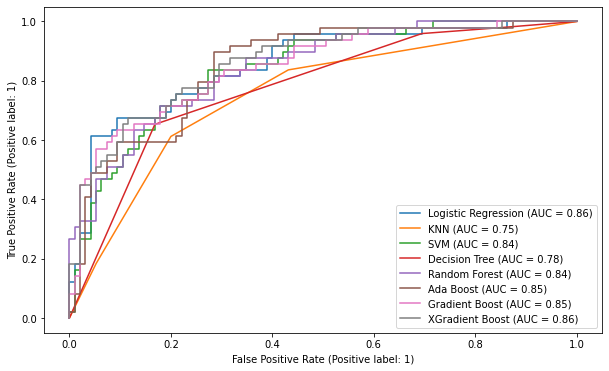

In [60]:
fig = plot_roc_curve(lr_model_grid, X_test, y_test, name="Logistic Regression")
fig = plot_roc_curve(knn_model_grid, X_test, y_test, name="KNN", ax=fig.ax_)
fig = plot_roc_curve(svm_model_grid, X_test, y_test, name="SVM", ax=fig.ax_)
fig = plot_roc_curve(dt_model_grid, X_test, y_test, name="Decision Tree", ax=fig.ax_)
fig = plot_roc_curve(rf_model_grid, X_test, y_test, name="Random Forest", ax=fig.ax_)
fig = plot_roc_curve(ada_model_grid, X_test, y_test, name="Ada Boost", ax=fig.ax_)
fig = plot_roc_curve(gb_model_grid, X_test, y_test, name="Gradient Boost", ax=fig.ax_)
fig = plot_roc_curve(xgb_model_grid, X_test, y_test, name="XGradient Boost", ax=fig.ax_)


## Presicion-Recall/AP

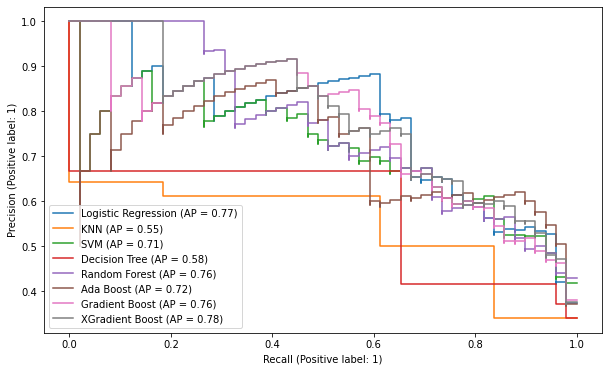

In [61]:
fig = plot_precision_recall_curve(lr_model_grid, X_test, y_test, name="Logistic Regression")
fig = plot_precision_recall_curve(knn_model_grid, X_test, y_test, name="KNN", ax=fig.ax_)
fig = plot_precision_recall_curve(svm_model_grid, X_test, y_test, name="SVM", ax=fig.ax_)
fig = plot_precision_recall_curve(dt_model_grid, X_test, y_test, name="Decision Tree", ax=fig.ax_)
fig = plot_precision_recall_curve(rf_model_grid, X_test, y_test, name="Random Forest", ax=fig.ax_)
fig = plot_precision_recall_curve(ada_model_grid, X_test, y_test, name="Ada Boost", ax=fig.ax_)
fig = plot_precision_recall_curve(gb_model_grid, X_test, y_test, name="Gradient Boost", ax=fig.ax_)
fig = plot_precision_recall_curve(xgb_model_grid, X_test, y_test, name="XGradient Boost", ax=fig.ax_)


# Conclusion

This notebook is prepared for a complete reference guide in classification tasks. A general performance metrics are explained first, then machine learning algorithms are applied in a clean, unbalanced small dataset. One can use the codes here to start a model training.

>Credits: The most codes and the images that are not referenced are adapted from [Clarusway](https://www.clarusway.com) Data Science course materials.

Prepared by Halil Saglamlar

e-mail: hsaglamlar@gmail.com

In [ ]:
kaggle datasets download -d mathchi/diabetes-data-set